In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

total_data = pd.read_csv("../data/processed/Extrovert vs. Introvert Personality Traits Dataset_Syncoraai_Synthetic data.csv")
total_data.head()


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,0,4.0,7.0,0,13.0,4.0,0
1,1.0,0,4.0,4.0,0,11.0,5.0,0
2,4.0,1,3.0,1.0,1,3.0,1.0,1
3,6.0,1,0.0,2.0,1,1.0,0.0,1
4,-0.0,0,4.0,6.0,0,13.0,5.0,0


In [14]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           4998 non-null   float64
 1   Stage_fear                 4998 non-null   int64  
 2   Social_event_attendance    4998 non-null   float64
 3   Going_outside              4998 non-null   float64
 4   Drained_after_socializing  4998 non-null   int64  
 5   Friends_circle_size        4998 non-null   float64
 6   Post_frequency             4998 non-null   float64
 7   Personality                4998 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 312.5 KB


In [15]:
import pandas as pd
# Cargar el conjunto de datos
data = pd.read_csv("../data/processed/Extrovert vs. Introvert Personality Traits Dataset_Syncoraai_Synthetic data.csv")
# Suponiendo que la columna de clase se llama 'Clase'
class_counts = data['Personality'].value_counts()
total_samples = len(data)
# Calcular el porcentaje de cada clase
class_distribution = (class_counts / total_samples) * 100
# Imprimir la distribución de clases
print("Distribución de clases:")
print(class_distribution)
# Verificar si hay un desbalance significativo
for class_label, count in class_counts.items():
    if count < total_samples * 0.1:  # 10% como umbral
        print(f"La clase '{class_label}' está subrepresentada con solo {count} muestras.")

Distribución de clases:
Personality
0    51.960784
1    48.039216
Name: count, dtype: float64


In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
# Crear un conjunto de datos sintético
X, y = make_classification(n_classes=2, weights=[0.8, 0.2], n_features=4, n_samples=100, random_state=42)
# Imprimir el número de muestras en cada clase antes de SMOTE
print('Antes de SMOTE:')
print('Muestras en clase 0:', sum(y == 0))
print('Muestras en clase 1:', sum(y == 1))
# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
# Imprimir el número de muestras en cada clase después de SMOTE
print('Después de SMOTE:')
print('Muestras en clase 0:', sum(y_smote == 0))
print('Muestras en clase 1:', sum(y_smote == 1))

Antes de SMOTE:
Muestras en clase 0: 80
Muestras en clase 1: 20
Después de SMOTE:
Muestras en clase 0: 80
Muestras en clase 1: 80


In [17]:
from sklearn.model_selection import train_test_split

num_variables = ["Time_spent_Alone", "Stage_fear", "Social_event_attendance", "Going_outside", "Drained_after_socializing", "Friends_circle_size", "Post_frequency"]

# Dividimos el conjunto de datos en muestras de train y test
X = total_data.drop("Personality", axis = 1)[num_variables]
y = total_data["Personality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
1738,1.0,0,9.0,4.0,0,10.0,3.0
3986,1.0,0,5.0,4.0,0,6.0,7.0
2915,0.0,0,9.0,6.0,0,13.0,5.0
1595,4.0,0,7.0,4.0,0,13.0,10.0
3213,3.0,0,9.0,6.0,0,13.0,7.0


In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.946

In [21]:
## Reporte de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       517
           1       0.95      0.94      0.94       483

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



Text(50.722222222222214, 0.5, 'Real')

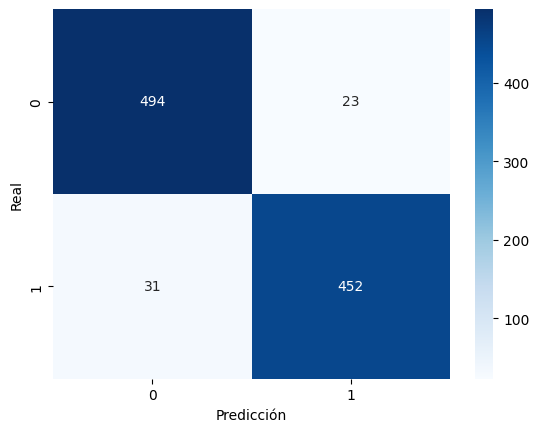

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Visualización con seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')

In [23]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,

In [27]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


predictions = model.predict(X_test)

results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions
})


results.to_csv('predictions.csv', index=False)


params = model.get_params()


params_df = pd.DataFrame(params.items(), columns=['Parameter', 'Value'])


params_df.to_csv('../models/model_parameters.csv', index=False)

print("Predicciones guardadas en 'predictions.csv'")
print("Parámetros del modelo guardados en 'model_parameters.csv'")


Predicciones guardadas en 'predictions.csv'
Parámetros del modelo guardados en 'model_parameters.csv'
